<h1> Datos para probar las técnicas de analísis. </h1>

<h2>Los pasos que intentare seguir para tener una metodología son:</h2>
<br>
<li>Paso cero: Extraccion de los datos, limpieza, reducción y eliminación en los casos que apliquen.</li>
<li>Paso uno: Estandarizar, normalizar y/o reducir los datos.</li>
<li>Paso dos: Codificar las variables categoricas.</li>
<li>Paso tres: Escojer el médelo de machine learning que nos ayude a resolver el problema</li>

<p>Estos datos se bajaron de kaggle. Son de una empresa que tiene farmacias en toda europa. Así que busca conocer </p>
<p>el comportamiento de sus ventas. Lo que vamos a realizar es una analísis de regresión multivariable. </p>

In [1]:
#Vamos a importar las librerias para manipular datos. 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
#Importemos los datos de entrenamiento y verifiquemos su tamaño 
train = pd.read_csv("DrugStoreTrain.csv")
print("\nTamaño de la matriz\n", train.shape)


Tamaño de la matriz
 (1017209, 9)


C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Importemos los datos de cada farmacia.
store = pd.read_csv("DrugStore.csv")
print("\nTamaño de la matriz\n", store.shape)


Tamaño de la matriz
 (1115, 10)


In [5]:
#Vamos a unir las matrices para poder realizar el analísis con base en sus caracteristica y no solo el tiempo. 
df = store.merge(train,on=["Store"], how="inner")

In [6]:
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", df.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [7]:
#Colocar indice al dataframe matriz.
indice = np.arange(0,df.shape[0])
df = df.reindex( indice )
#Revisar la matriz.
print("\nTamaño de la matriz: \n ", df.shape )
print("\nPrimeras filas de la matriz: \n ",  df.head(2) )
#Cuantificar la cantidad de datos perdidos para determinar si los eliminamos, rellenamos, etc.
print("\nCantidad de datos faltantes: \n ", df.isnull().sum()  )
print("\nCantidad de datos faltantes en porcentaje \n", df.isnull().sum()/df.shape[0]*100)
#Revisar algunas estadisticas basicas.
print("\nEstadisticas basicas: \n ", df.describe() )
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", df.info() )


Tamaño de la matriz: 
  (1017209, 18)

Primeras filas de la matriz: 
     Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      1         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2008.0       0              NaN              NaN   

  PromoInterval  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           NaN          5  2015-07-31   5263        555     1      1   
1           NaN          4  2015-07-30   5020        546     1      1   

  StateHoliday  SchoolHoliday  
0            0              1  
1            0              1  

Cantidad de datos faltantes: 
  Store                             0
StoreType                         0
Assortment                        0
Competi

In [8]:
print("\n CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval \n")
print("\nLas siguiente columnas serán elimnadas de la matriz ya que superan un 30 porciento de datos perdidos.\n")
df = df.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","PromoInterval"], axis=1)
print("\nEstas son las columnas que nos quedan\n", df.columns ) 


 CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval 


Las siguiente columnas serán elimnadas de la matriz ya que superan un 30 porciento de datos perdidos.


Estas son las columnas que nos quedan
 Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [9]:
#Se corregira el .25 porciento de "competitiondistance", se llena la información con la moda de esa variable.
df["CompetitionDistance"]=df["CompetitionDistance"].fillna(df["CompetitionDistance"].mode()[0])
print("\nMiremos cuanta información esta perdida: \n", df.isnull().sum()  )
print( "\nMiremos el resultado en procentaje \n", df.isnull().sum()/df.shape[0]*100)


Miremos cuanta información esta perdida: 
 Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
dtype: int64

Miremos el resultado en procentaje 
 Store                  0.0
StoreType              0.0
Assortment             0.0
CompetitionDistance    0.0
Promo2                 0.0
DayOfWeek              0.0
Date                   0.0
Sales                  0.0
Customers              0.0
Open                   0.0
Promo                  0.0
StateHoliday           0.0
SchoolHoliday          0.0
dtype: float64


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>]], dtype=object)

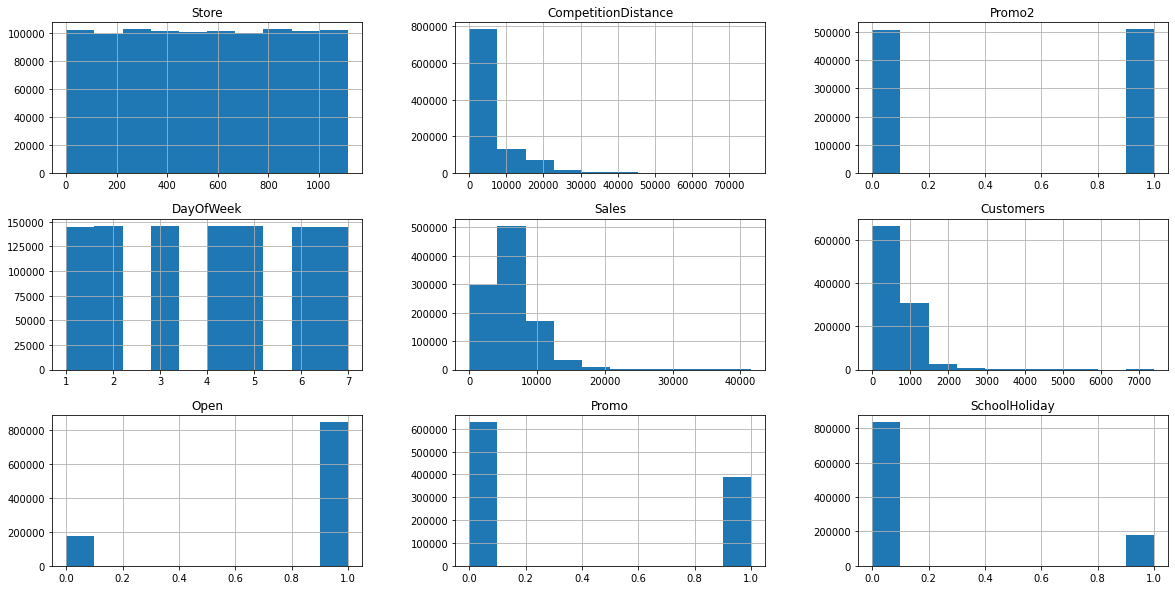

In [10]:
#Revisar la forma de las variables.
df.hist( figsize=(20,10) )

In [11]:
#Separemos las columnas numericas de las categoricas. Como lo índica la matriz.
columnas_categoricas = df.select_dtypes("object")
columnas_numericas = df.select_dtypes(np.number)
print("\nVariables numericas: \n ", columnas_numericas.columns )
print("\nVariables categoricas: \n ", columnas_categoricas.columns )


Variables numericas: 
  Index(['Store', 'CompetitionDistance', 'Promo2', 'DayOfWeek', 'Sales',
       'Customers', 'Open', 'Promo', 'SchoolHoliday'],
      dtype='object')

Variables categoricas: 
  Index(['StoreType', 'Assortment', 'Date', 'StateHoliday'], dtype='object')


In [12]:
#LA variable "date" esta calificada como categorica. Pongamos la data como debe ser de tiempo.
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) #El método da el formato correcto en este caso. 
#la columa de fechba podemos expandar los datos en meses, cuartos, etc.. para una mejor clasificación por época del año.
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.week
df["Season"] = np.where(df["Month"].isin([3,4,5]),"Spring", np.where(df["Month"].isin([6,7,8]), "Summer",
                np.where(df["Month"].isin([9,10,11]),"Fall", np.where(df["Month"].isin([12,1,2]),"Winter","None"))))

C:\Users\WINDOW~1\AppData\Local\Temp/ipykernel_1284/2345070241.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week"] = df["Date"].dt.week


In [13]:
#Separemos las columnas numericas de las categoricas. Como lo índica la matriz.
columnas_categoricas = df.select_dtypes("object")
columnas_numericas = df.select_dtypes(np.number)
print("\nVariables numericas: \n ", columnas_numericas.columns )
print("\nVariables categoricas: \n ", columnas_categoricas.columns )


Variables numericas: 
  Index(['Store', 'CompetitionDistance', 'Promo2', 'DayOfWeek', 'Sales',
       'Customers', 'Open', 'Promo', 'SchoolHoliday', 'Month', 'Quarter',
       'Year', 'Day', 'Week'],
      dtype='object')

Variables categoricas: 
  Index(['StoreType', 'Assortment', 'StateHoliday', 'Season'], dtype='object')


In [14]:
for columna in columnas_categoricas:
    print("\nLa variable y sus categorias:\n", df[columna].value_counts() )


La variable y sus categorias:
 a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

La variable y sus categorias:
 a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

La variable y sus categorias:
 0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

La variable y sus categorias:
 Spring    307740
Summer    262015
Winter    260904
Fall      186550
Name: Season, dtype: int64


In [15]:
#Corregir los valores dentro de esta columna antes de categorizar todas las columnas.
df["StateHoliday"]= np.where(df["StateHoliday"] == 0,0,1)
df["StateHoliday"].value_counts()

1    886137
0    131072
Name: StateHoliday, dtype: int64

In [16]:
#Separemos las columnas numericas de las categoricas. Como lo índica la matriz.
columnas_categoricas = df.select_dtypes("object")
columnas_numericas = df.select_dtypes(np.number)
print("\nVariables numericas: \n ", columnas_numericas.columns )
print("\nVariables categoricas: \n ", columnas_categoricas.columns )


Variables numericas: 
  Index(['Store', 'CompetitionDistance', 'Promo2', 'DayOfWeek', 'Sales',
       'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Month',
       'Quarter', 'Year', 'Day', 'Week'],
      dtype='object')

Variables categoricas: 
  Index(['StoreType', 'Assortment', 'Season'], dtype='object')


In [17]:
# Hay un módulo que nos ayuda a realizar esta acción.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Hay que mirar como quedan las variable categoricas codificadas.
for columna in columnas_categoricas:
    print('\nNombre de la columna:', "\n", columna)    
    df[columna] = df[[columna]].apply(encoder.fit_transform)
    for i in range(len(encoder.classes_)):
        print(encoder.classes_[i],':', i)


Nombre de la columna: 
 StoreType
a : 0
b : 1
c : 2
d : 3

Nombre de la columna: 
 Assortment
a : 0
b : 1
c : 2

Nombre de la columna: 
 Season
Fall : 0
Spring : 1
Summer : 2
Winter : 3


In [30]:
"""
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

for col in columnas_categoricas:    
    print('\n')
    print('Columns Name: %s' %col)
    print('************')
    df[col] = df[[col]].apply(encoder.fit_transform)
    for i in range(len(encoder.classes_)):
        print(encoder.classes_[i],':', i)
        
#print("Shape of Data:",temp.shape)
#print("Distinct Datatypes:",temp.dtypes.unique())
"""

'\nfrom sklearn.preprocessing import OneHotEncoder\nencoder = OneHotEncoder()\n\nfor col in columnas_categoricas:    \n    print(\'\n\')\n    print(\'Columns Name: %s\' %col)\n    print(\'************\')\n    df[col] = df[[col]].apply(encoder.fit_transform)\n    for i in range(len(encoder.classes_)):\n        print(encoder.classes_[i],\':\', i)\n        \n#print("Shape of Data:",temp.shape)\n#print("Distinct Datatypes:",temp.dtypes.unique())\n'

In [18]:
#Aquí verificamos como todas las varibales ahora son numericas, tanto numeros enteros como continuos.
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", df.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   StoreType            1017209 non-null  int32         
 2   Assortment           1017209 non-null  int32         
 3   CompetitionDistance  1017209 non-null  float64       
 4   Promo2               1017209 non-null  int64         
 5   DayOfWeek            1017209 non-null  int64         
 6   Date                 1017209 non-null  datetime64[ns]
 7   Sales                1017209 non-null  int64         
 8   Customers            1017209 non-null  int64         
 9   Open                 1017209 non-null  int64         
 10  Promo                1017209 non-null  int64         
 11  StateHoliday         1017209 non-null  int32         
 12  SchoolHoliday        1017209 non-null  int64         
 1

<AxesSubplot:>

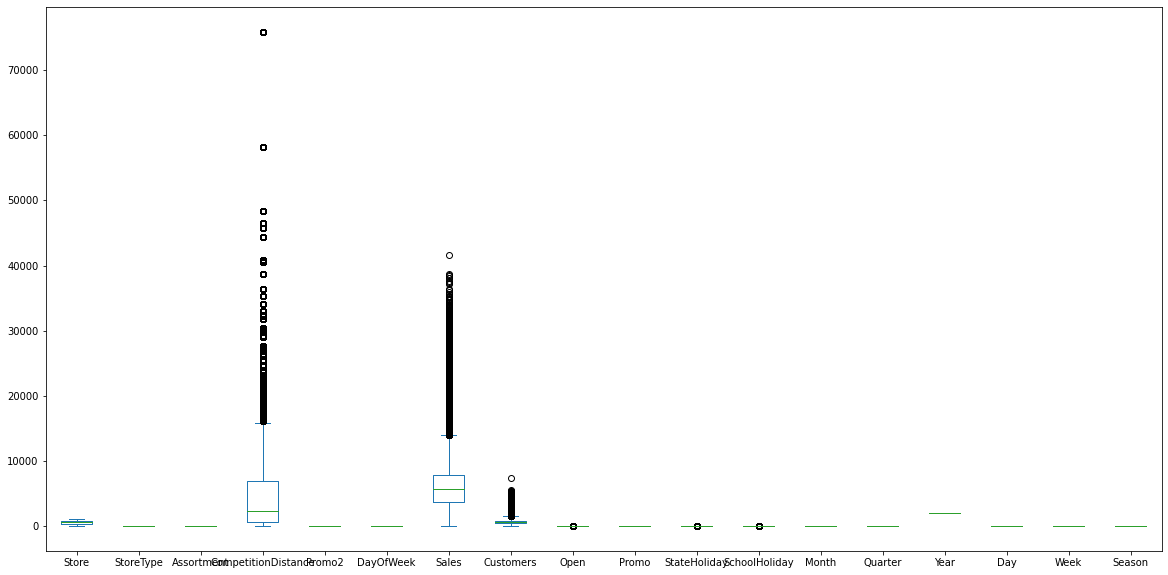

In [19]:
#Revisar los outliers.
df.plot( kind = "box", figsize=(20,10) )

In [20]:
#Vamos a remover los "outliers" en las columnas numericas que hacen el sesgo en los datos.
def remover_outliers(matriz, columnas):    
    for columna in columnas:
        q1 = matriz[columna].quantile(q = 0.25)
        q3 = matriz[columna].quantile(q = 0.75)
        interCuartil = q3 - q1
        rangoAlto = q3 + (1.5*interCuartil)
        rangoBajo = q1 - (1.5*interCuartil)
        matriz.loc[matriz[columna] > rangoAlto, columna] = np.nan
        matriz.loc[matriz[columna] < rangoBajo, columna] = np.nan
    return matriz.dropna()

C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWith

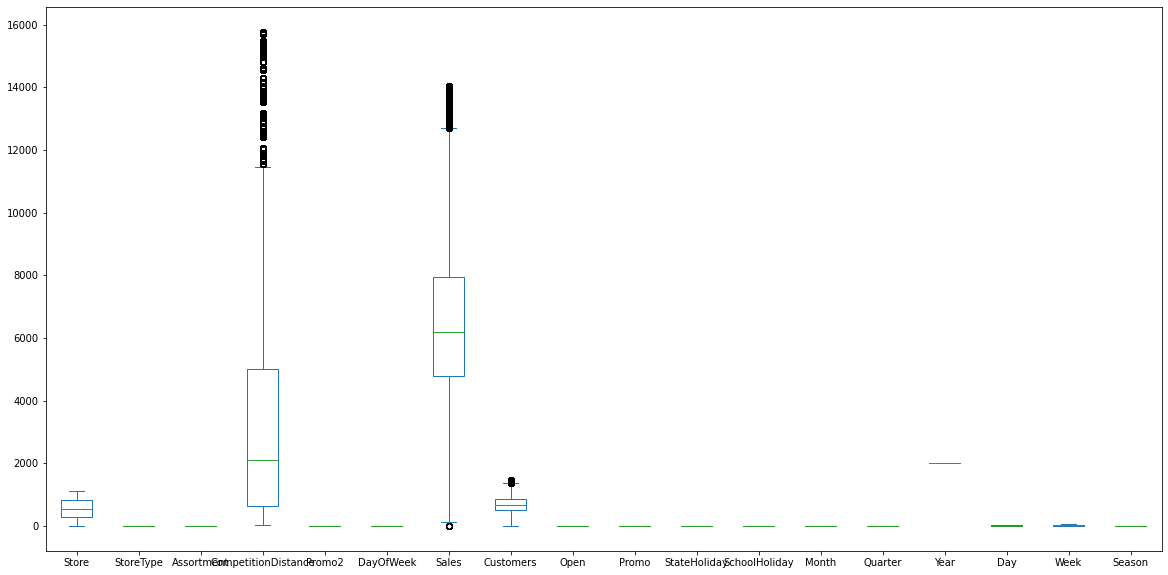

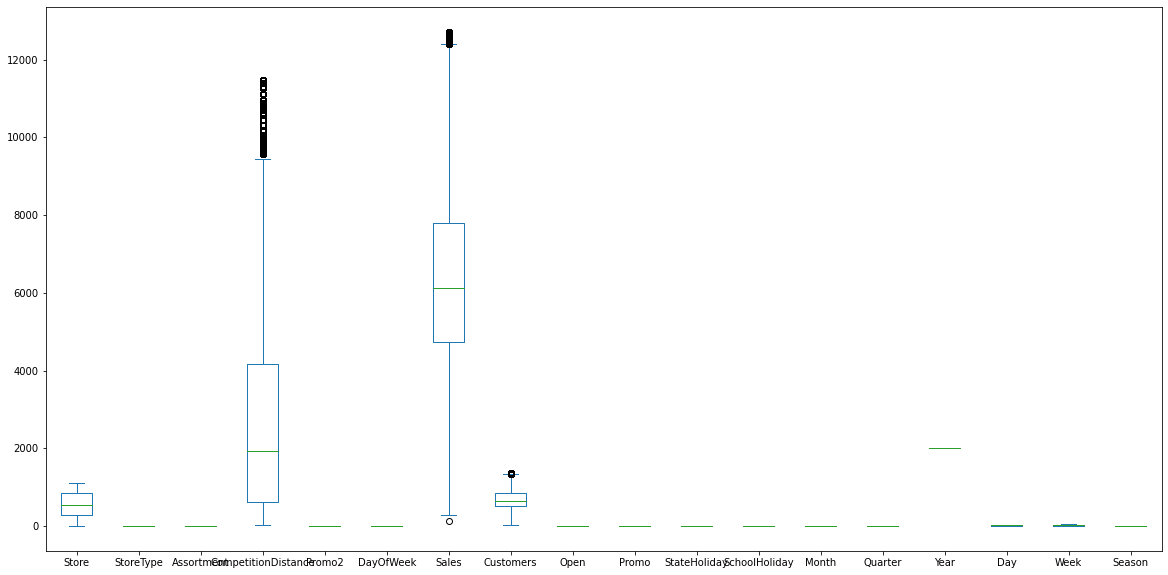

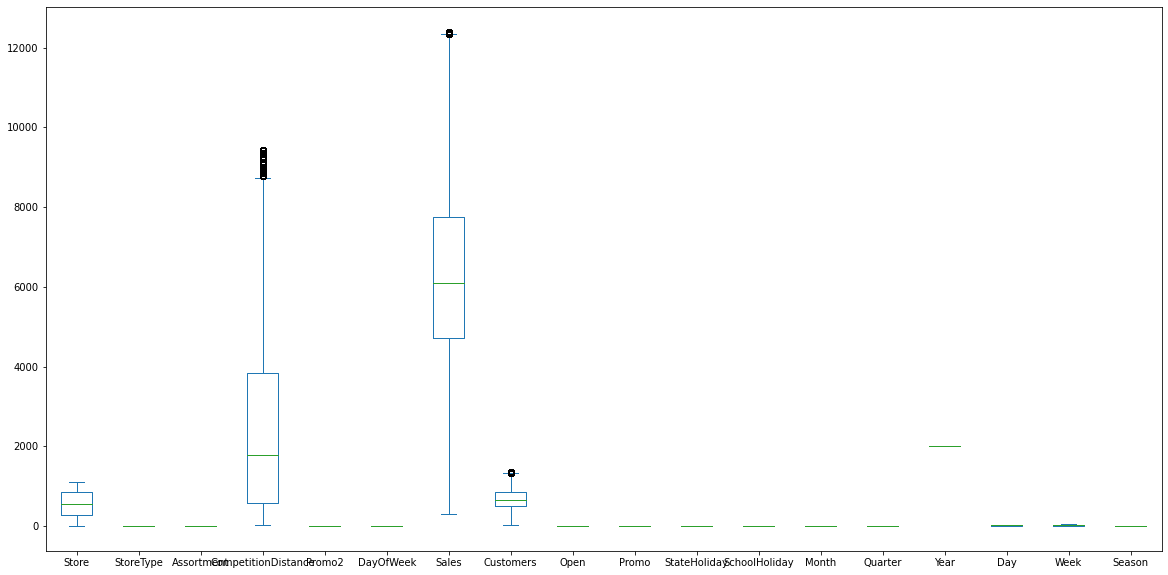

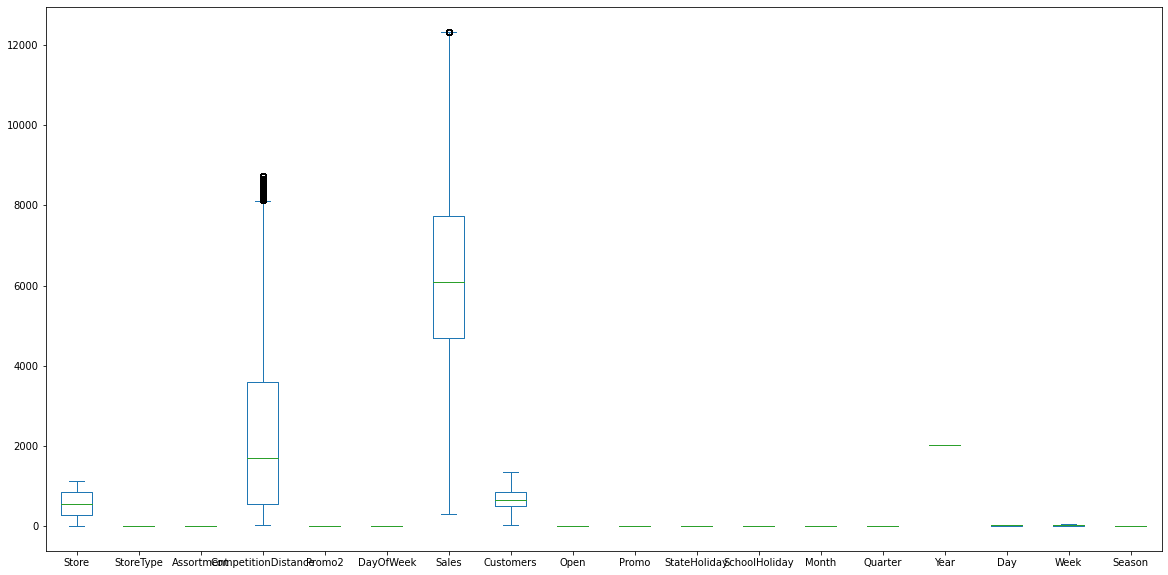

In [21]:
for i in range(4):
    df = remover_outliers(df, columnas_numericas)
    #df = remover_outliers(df, ["CompetitionDistance","Sales","Customers"])
    #Revisar los outliers.
    df.plot( kind = "box", figsize=(20,10) )

<AxesSubplot:>

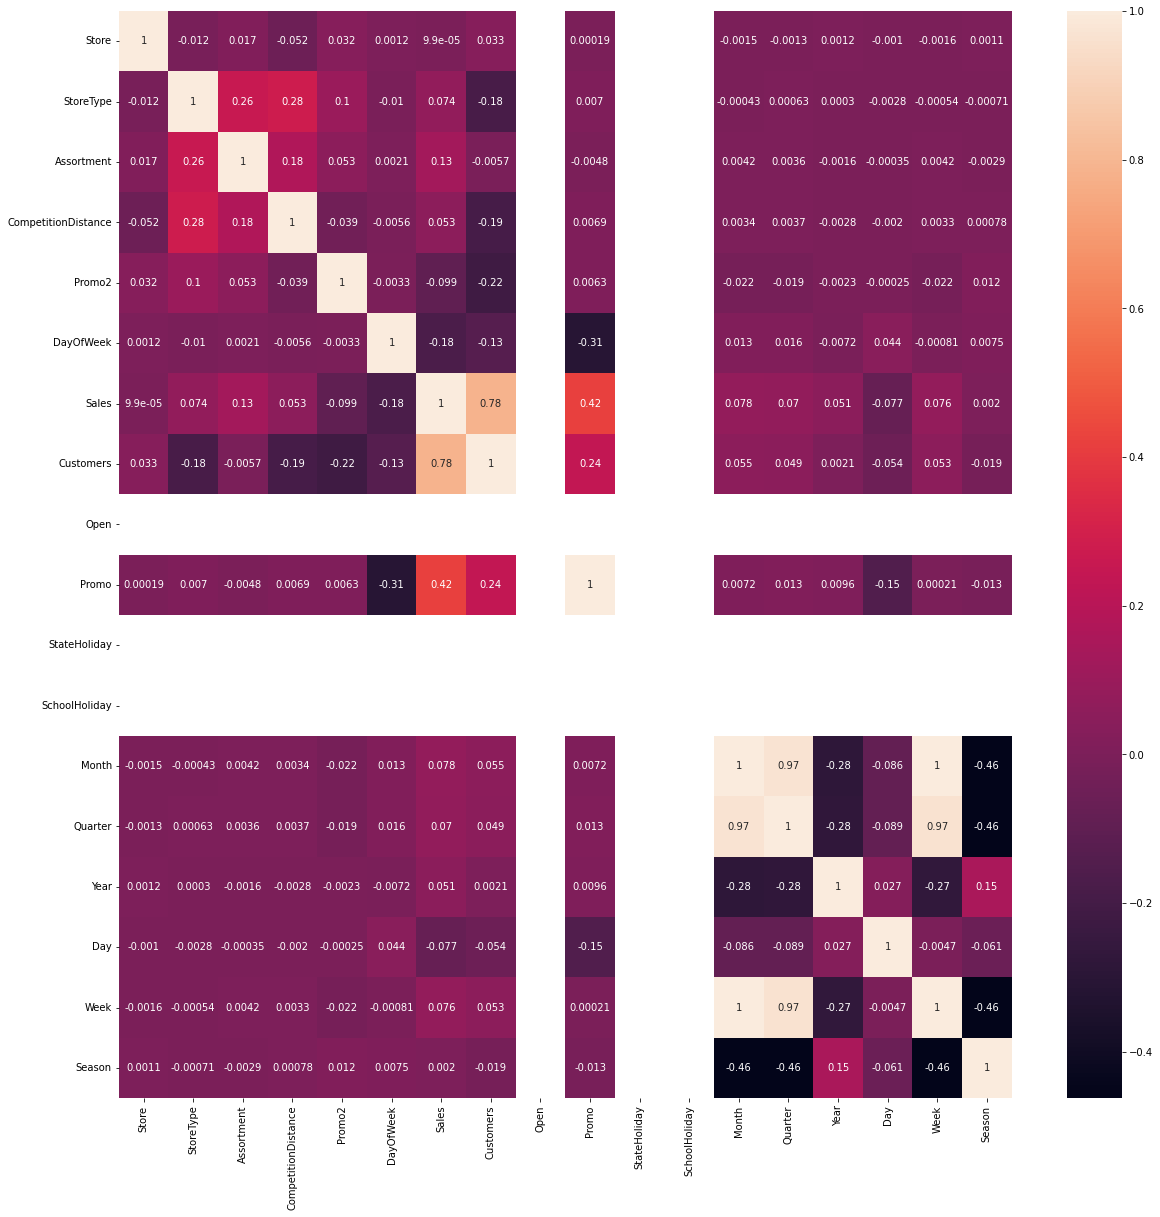

In [22]:
# Miremos la correlacion de cada variable
plt.figure(figsize=(20,20))  
corr = df.corr()
sns.heatmap(corr, annot= True)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'StoreType'}>,
        <AxesSubplot:title={'center':'Assortment'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'StateHoliday'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Quarter'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>,
        <AxesSubplot:title={'center':'Season'}>, <AxesSubplot:>]],
      dtype=object)

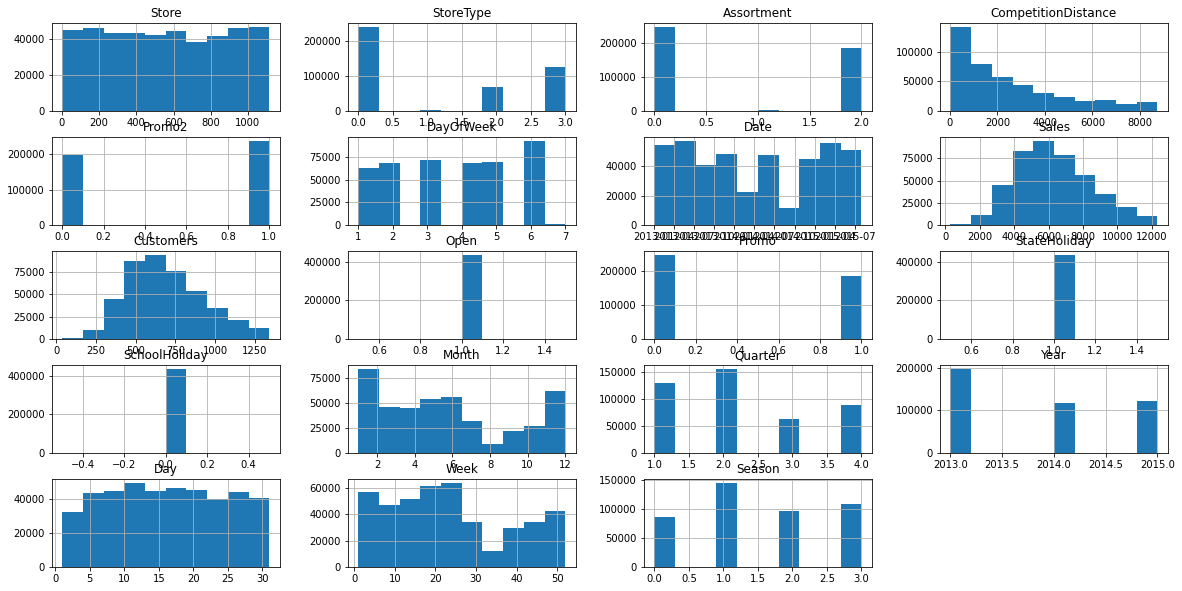

In [23]:
#Revisar la forma de las variables.
df.hist( figsize=(20,10) )

In [26]:
print("\nEstas con las columnas de toda la base\n", df.columns)


Estas con las columnas de toda la base
 Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'Quarter', 'Year', 'Day',
       'Week', 'Season'],
      dtype='object')


In [27]:
X = df.loc[:, ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2',
       'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'Quarter', 'Year', 'Day',
       'Week', 'Season']]
y = df.loc[:, ["Sales"]]
print("\nPero se van separar en una matriz x y un vector y\n") 
print("\nTamaño de la matriz sin la columna date\n",  X.shape )
print("\nEstas con las columnas de X\n", X.columns)
print("\nTamaño del vector a predecir\n",  y.shape )
print("\nEstas con las columnas de y\n", y.columns)


Pero se van separar en una matriz x y un vector y


Tamaño de la matriz sin la columna date
 (434453, 17)

Estas con las columnas de X
 Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2',
       'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Month', 'Quarter', 'Year', 'Day', 'Week', 'Season'],
      dtype='object')

Tamaño del vector a predecir
 (434453, 1)

Estas con las columnas de y
 Index(['Sales'], dtype='object')


In [31]:
X = df.loc[:, ['Store', 'StoreType', 'Assortment','CompetitionDistance', 'Promo2',
       'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'Quarter', 'Year', 'Day',
       'Week', 'Season']]
y = df.loc[:, ["Sales"]]
print( X.shape, y.shape)

(434453, 17) (434453, 1)


In [32]:
from sklearn.model_selection import train_test_split
#Primero se separan los datosn en un 80 - 20 
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=2018)
#Com en keras se necesitan tres conjuntos de datos para entrenar separemos el train set para validar
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)
#Revisar los tamaños seleccionados
print("Tamaño de x_train:",x_train.shape)
print("Tamaño de x_val:",x_val.shape)
print("Tamaño de x_test:",x_test.shape)
print("Tamaño de y_train:",y_train.shape)
print("Tamaño de y_val:",y_val.shape)
print("Tamaño de y_test:",y_test.shape)

Tamaño de x_train: (312805, 17)
Tamaño de x_val: (34757, 17)
Tamaño de x_test: (86891, 17)
Tamaño de y_train: (312805, 1)
Tamaño de y_val: (34757, 1)
Tamaño de y_test: (86891, 1)


In [33]:
mean_sales = y_train.mean()
print("Venta promedio de la nueva matriz :",mean_sales)

Venta promedio de la nueva matriz : Sales    6308.061332
dtype: float64


In [34]:
print("MAE para los datos de prueba:", abs(y_test - mean_sales).mean()[0])

MAE para los datos de prueba: 1765.2688632029835


In [35]:
#Crear elmodelo en keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(150,input_dim=17,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])
model.fit(x_train,y_train, epochs=3,batch_size=64, validation_data=(x_val,y_val))

Epoch 1/3
4888/4888 [==============================] - 6s 877us/step - loss: 1004.2921 - mean_absolute_error: 1004.2921 - val_loss: 908.4037 - val_mean_absolute_error: 908.4037
Epoch 2/3
4888/4888 [==============================] - 4s 890us/step - loss: 870.5206 - mean_absolute_error: 870.5206 - val_loss: 851.7663 - val_mean_absolute_error: 851.7663
Epoch 3/3
4888/4888 [==============================] - 4s 849us/step - loss: 838.2232 - mean_absolute_error: 838.2232 - val_loss: 833.8606 - val_mean_absolute_error: 833.8606


In [36]:
#Evaluar los datos de prueba.
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

2716/2716 [==============================] - 2s 640us/step - loss: 831.4048 - mean_absolute_error: 831.4048
Metric  loss : 831.4
Metric  mean_absolute_error : 831.4


In [37]:
#Mejorando el modelo
model = Sequential()
model.add(Dense(150,input_dim = 17,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val, y_val),epochs=3,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/3
4888/4888 [==============================] - 8s 2ms/step - loss: 1503075.3750 - mean_absolute_error: 929.6385 - val_loss: 1248361.6250 - val_mean_absolute_error: 867.4760
Epoch 2/3
4888/4888 [==============================] - 7s 2ms/step - loss: 1163169.1250 - mean_absolute_error: 827.8442 - val_loss: 1117845.0000 - val_mean_absolute_error: 815.3745
Epoch 3/3
2716/2716 [==============================] - 2s 814us/step - loss: 1053811.1250 - mean_absolute_error: 791.5568
Metric  loss : 1053811.12
Metric  mean_absolute_error : 791.56


In [38]:
#Mejorando el modelo
model = Sequential()
model.add(Dense(150,input_dim = 17,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=5,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/5
4888/4888 [==============================] - 11s 2ms/step - loss: 1540354.3750 - mean_absolute_error: 934.7314 - val_loss: 1207321.1250 - val_mean_absolute_error: 837.4924
Epoch 2/5
4888/4888 [==============================] - 10s 2ms/step - loss: 1165596.3750 - mean_absolute_error: 828.4337 - val_loss: 1102879.2500 - val_mean_absolute_error: 806.1859
Epoch 3/5
4888/4888 [==============================] - 11s 2ms/step - loss: 1106293.5000 - mean_absolute_error: 805.6099 - val_loss: 1059854.3750 - val_mean_absolute_error: 787.1614
Epoch 4/5
4888/4888 [==============================] - 11s 2ms/step - loss: 1077944.0000 - mean_absolute_error: 794.3885 - val_loss: 1076001.5000 - val_mean_absolute_error: 789.3867
Epoch 5/5
2716/2716 [==============================] - 3s 985us/step - loss: 1090350.0000 - mean_absolute_error: 810.1111
Metric  loss : 1090350.0
Metric  mean_absolute_error : 810.11


In [39]:
#Aumentado el numero de neuronas
model = Sequential()
model.add(Dense(350,input_dim = 17,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=5,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

Epoch 1/5
4888/4888 [==============================] - 11s 2ms/step - loss: 1438075.6250 - mean_absolute_error: 910.4621 - val_loss: 1166029.6250 - val_mean_absolute_error: 823.1436
Epoch 2/5
4888/4888 [==============================] - 10s 2ms/step - loss: 1144419.8750 - mean_absolute_error: 820.8184 - val_loss: 1091173.2500 - val_mean_absolute_error: 797.8618
Epoch 3/5
4888/4888 [==============================] - 10s 2ms/step - loss: 1103017.2500 - mean_absolute_error: 804.5539 - val_loss: 1072805.2500 - val_mean_absolute_error: 800.2028
Epoch 4/5
4888/4888 [==============================] - 10s 2ms/step - loss: 1075811.6250 - mean_absolute_error: 793.4750 - val_loss: 1038187.9375 - val_mean_absolute_error: 783.4272
Epoch 5/5
2716/2716 [==============================] - 2s 841us/step - loss: 1012767.1250 - mean_absolute_error: 768.0743
Metric  loss : 1012767.12
Metric  mean_absolute_error : 768.07


In [40]:
from keras.callbacks import History
history = History()
model = Sequential()
model.add(Dense(350,input_dim = 17,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=5,batch_size=64,callbacks=[history])
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/5
4888/4888 [==============================] - 27s 5ms/step - loss: 1457884.8750 - mean_absolute_error: 919.1231 - val_loss: 1179664.5000 - val_mean_absolute_error: 844.8871
Epoch 2/5
4888/4888 [==============================] - 27s 5ms/step - loss: 1150297.3750 - mean_absolute_error: 822.1285 - val_loss: 1339051.3750 - val_mean_absolute_error: 886.9763
Epoch 3/5
4888/4888 [==============================] - 26s 5ms/step - loss: 1095684.6250 - mean_absolute_error: 800.6763 - val_loss: 1292546.7500 - val_mean_absolute_error: 898.8595
Epoch 4/5
4888/4888 [==============================] - 26s 5ms/step - loss: 1050912.1250 - mean_absolute_error: 782.4651 - val_loss: 986393.1250 - val_mean_absolute_error: 754.0245
Epoch 5/5
2716/2716 [==============================] - 5s 2ms/step - loss: 927624.1250 - mean_absolute_error: 729.8810
Metric  loss : 927624.12
Metric  mean_absolute_error : 729.88


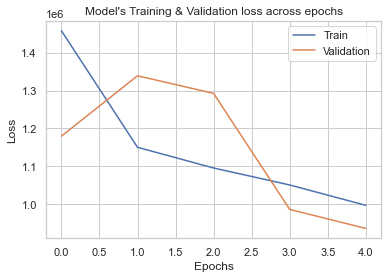

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [42]:
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].
values,y_test["Predicted Sales"].values))

        Actual Sales  Predicted Sales
6719          3502.0      3695.188232
465935        6160.0      6095.092773
33129         8298.0      8165.756348
51988        10899.0     10324.550781
115014        9592.0      9000.343750
449030        7058.0      8090.813965
430514        5761.0      8203.558594
172757       12262.0      9126.302734
92887         8309.0      8757.127930
389904        7228.0      6162.945312
MSE : 927624.9135848033
MAE : 729.8800833590433


In [43]:
df.to_csv("LinRegKeras.csv")

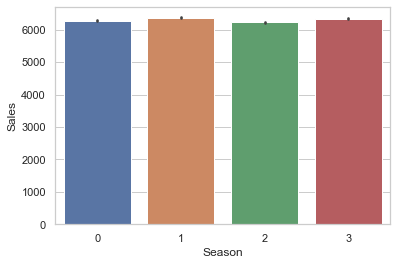

In [44]:
import seaborn as sns 
sns.set(style="whitegrid")
#¨Podemos entender las ventas durante las estaciones del año. 
ax = sns.barplot(x="Season", y="Sales", data=df)

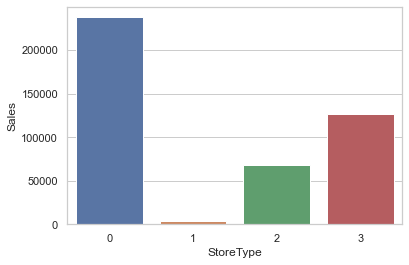

In [45]:
ax = sns.barplot(x="StoreType", y="Sales", data=df, estimator=np.size)

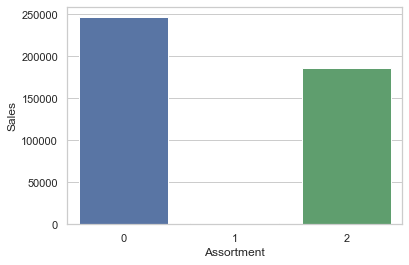

In [46]:
ax = sns.barplot(x="Assortment", y="Sales", data=df, estimator=np.size)

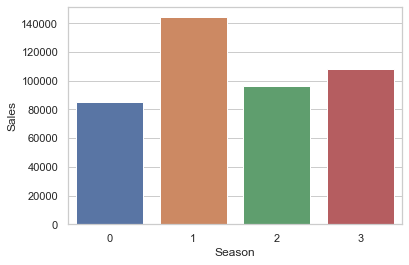

In [47]:
#Seaborn calcula el promedio de las variables, si queremos mirar la cantidad hay que modificar el método.
ax = sns.barplot(x="Season", y="Sales", data=df, estimator=np.size)

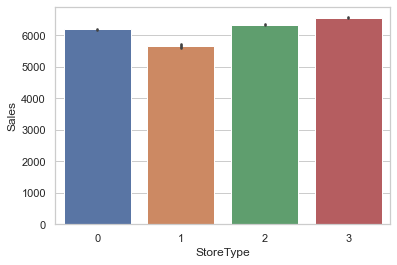

In [48]:
#Miremos las ventas y los diferentes de tienda
ax = sns.barplot(x="StoreType", y="Sales", data=df)

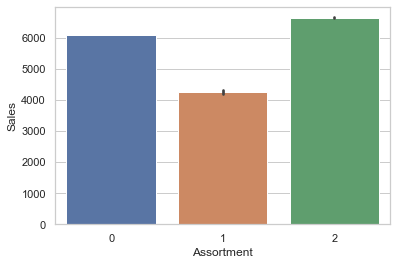

In [49]:
#Miremos la forma de las ventas y diferentes categorias
ax = sns.barplot(x="Assortment", y="Sales", data=df)